In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [506]:
df = pd.read_csv('C:\\Users\\mohamedsobhy\\Desktop\\lec10\\titanic\\full.csv')

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [508]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [509]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [510]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


# data frame copy from org

In [511]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["sex"] = lb_make.fit_transform(df["Sex"])
df[["sex", "Sex"]].head(11)

,sex,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male
5,1,male
6,1,male
7,1,male
8,0,female
9,0,female


In [512]:
df1 = df[['PassengerId','Age','sex','Survived','Class']].copy()

In [513]:
df1.head()

,PassengerId,Age,sex,Survived,Class
0,1,22.0,1,0.0,3.0
1,2,38.0,0,1.0,1.0
2,3,26.0,0,1.0,3.0
3,4,35.0,0,1.0,1.0
4,5,35.0,1,0.0,3.0


In [514]:
df1.describe()

,PassengerId,Age,sex,Survived,Class
count,1309.000000,1046.000000,1309.000000,891.000000,1304.000000
mean,655.000000,29.881138,0.644003,0.383838,2.291411
std,378.020061,14.413493,0.478997,0.486592,0.840852
min,1.000000,0.170000,0.000000,0.000000,1.000000
25%,328.000000,21.000000,0.000000,0.000000,1.750000
50%,655.000000,28.000000,1.000000,0.000000,3.000000
75%,982.000000,39.000000,1.000000,1.000000,3.000000
max,1309.000000,80.000000,1.000000,1.000000,3.000000


In [515]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Age          1046 non-null   float64
 2   sex          1309 non-null   int32  
 3   Survived     891 non-null    float64
 4   Class        1304 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 46.1 KB


In [516]:
df1["Age"] = pd.to_numeric(df1["Age"], errors='coerce')
df1["Class"] = pd.to_numeric(df1["Class"], errors='coerce')
df1["sex"] = pd.to_numeric(df1["sex"], errors='coerce')
df1["Survived"] = pd.to_numeric(df1["Survived"], errors='coerce')

In [517]:
df1['Age'] = df1['Age'].apply(lambda x: abs(x))
df1['Class'] = df1['Class'].apply(lambda x: abs(x))
df1['sex'] = df1['sex'].apply(lambda x: abs(x))
df1['Survived'] = df1['Survived'].apply(lambda x: abs(x))

In [518]:
df2 = df1.fillna(df1.median(axis=0), axis=0)

In [519]:
df2

,PassengerId,Age,sex,Survived,Class
0,1,22.0,1,0.0,3.0
1,2,38.0,0,1.0,1.0
2,3,26.0,0,1.0,3.0
3,4,35.0,0,1.0,1.0
4,5,35.0,1,0.0,3.0
...,...,...,...,...,...
1304,1305,28.0,1,0.0,3.0
1305,1306,39.0,0,0.0,1.0
1306,1307,38.5,1,0.0,3.0
1307,1308,28.0,1,0.0,3.0


In [520]:
df2.head(10)

,PassengerId,Age,sex,Survived,Class
0,1,22.0,1,0.0,3.0
1,2,38.0,0,1.0,1.0
2,3,26.0,0,1.0,3.0
3,4,35.0,0,1.0,1.0
4,5,35.0,1,0.0,3.0
5,6,28.0,1,0.0,3.0
6,7,54.0,1,0.0,1.0
7,8,2.0,1,0.0,3.0
8,9,27.0,0,1.0,3.0
9,10,14.0,0,1.0,2.0


In [521]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   sex          1309 non-null   int64  
 3   Survived     1309 non-null   float64
 4   Class        1309 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 51.3 KB


In [522]:
df2.describe()

,PassengerId,Age,sex,Survived,Class
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.503186,0.644003,0.261268,2.294118
std,378.020061,12.905241,0.478997,0.439494,0.840382
min,1.000000,0.170000,0.000000,0.000000,1.000000
25%,328.000000,22.000000,0.000000,0.000000,2.000000
50%,655.000000,28.000000,1.000000,0.000000,3.000000
75%,982.000000,35.000000,1.000000,1.000000,3.000000
max,1309.000000,80.000000,1.000000,1.000000,3.000000


In [523]:
df2['Age'].value_counts()

28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
76.00      1
22.50      1
74.00      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64

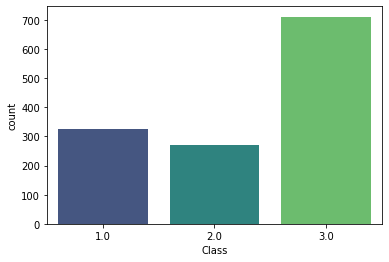

In [524]:
sns.countplot(x='Class', data=df2, palette='viridis')

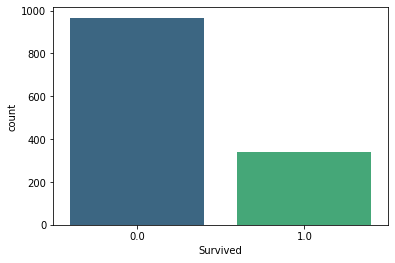

In [525]:
sns.countplot(x='Survived', data=df2, palette='viridis')

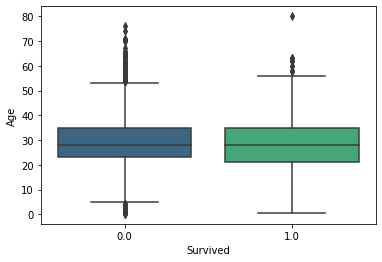

In [526]:
sns.boxplot(x='Survived', y='Age', data=df2, palette='viridis')

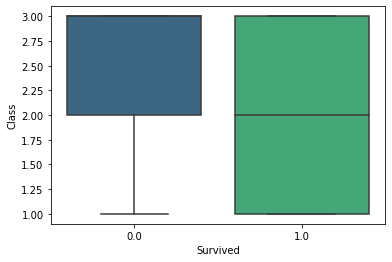

In [527]:
sns.boxplot(x='Survived', y='Class', data=df2, palette='viridis')

In [528]:
q1 = df2.quantile(0.25)
q1

PassengerId    328.0
Age             22.0
sex              0.0
Survived         0.0
Class            2.0
Name: 0.25, dtype: float64

In [529]:
q3 = df2.quantile(0.75)
q3

PassengerId    982.0
Age             35.0
sex              1.0
Survived         1.0
Class            3.0
Name: 0.75, dtype: float64

In [530]:
IQR = q3 -q1
IQR

PassengerId    654.0
Age             13.0
sex              1.0
Survived         1.0
Class            1.0
dtype: float64

In [538]:
for col in df2.columns:
    print(col)
    df2.loc[(df2[col]<(q1[col]-1.5*IQR[col]))|(df2[col]>(q3[col]+1.5*IQR[col])),col]=df2[col].median()

PassengerId
Age
sex
Survived
Class


In [539]:
df2.loc[(df2['Age']<(q1['Age']-1.5*IQR['Age']))|(df2['Age']>(q3['Age']+1.5*IQR['Age'])),'Age']=df2['Age'].median()

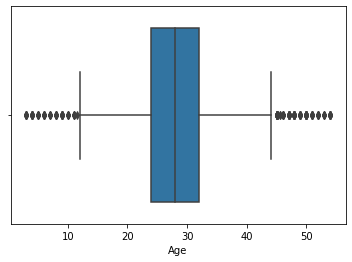

In [541]:
sns.boxplot(x=df2['Age'])

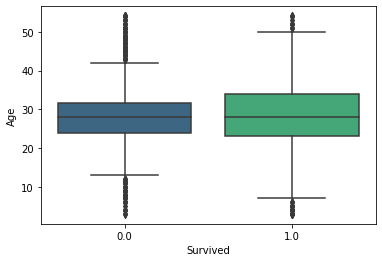

In [542]:
sns.boxplot(x='Survived', y='Age', data=df2, palette='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED08E41E08>,
      dtype=object)

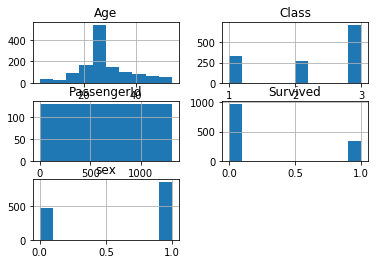

In [543]:
df2.hist()

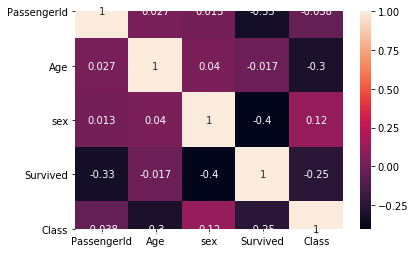

In [544]:
sns.heatmap(df2.corr(),annot=True)

C:\Users\mohamedsobhy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mohamedsobhy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


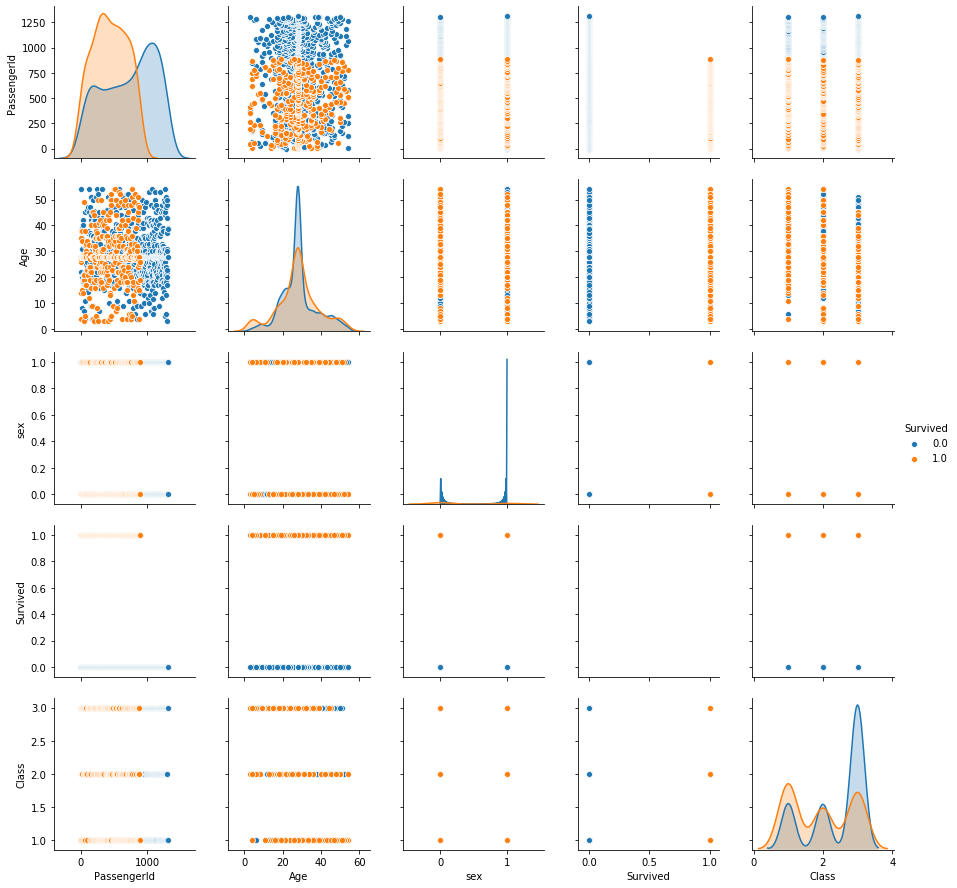

In [559]:
sns.pairplot(data=df2, hue='Survived')

In [545]:
df2

,PassengerId,Age,sex,Survived,Class
0,1.0,22.0,1.0,0.0,3.0
1,2.0,38.0,0.0,1.0,1.0
2,3.0,26.0,0.0,1.0,3.0
3,4.0,35.0,0.0,1.0,1.0
4,5.0,35.0,1.0,0.0,3.0
...,...,...,...,...,...
1304,1305.0,28.0,1.0,0.0,3.0
1305,1306.0,39.0,0.0,0.0,1.0
1306,1307.0,38.5,1.0,0.0,3.0
1307,1308.0,28.0,1.0,0.0,3.0


In [546]:
x = df2[['sex', 'Age', 'Class']]
y = df2['Survived']

In [547]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [548]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [549]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [550]:
y_pred = model.predict(x_test)
y_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [551]:
y_test

1263    0.0
1253    0.0
511     0.0
520     1.0
954     0.0
       ... 
1289    0.0
358     1.0
292     0.0
894     0.0
760     0.0
Name: Survived, Length: 262, dtype: float64

In [552]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [553]:
confusion_matrix(y_test, y_pred)

array([[172,  20],
       [ 42,  28]], dtype=int64)

In [555]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ed091b42c8>)

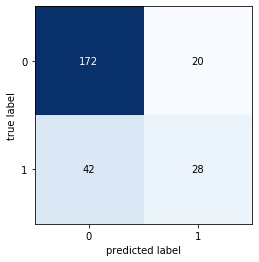

In [556]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [557]:
accuracy_score(y_test, y_pred)

0.7633587786259542

In [558]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       192
         1.0       0.58      0.40      0.47        70

    accuracy                           0.76       262
   macro avg       0.69      0.65      0.66       262
weighted avg       0.74      0.76      0.75       262

